In [2]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

chipotle_data = pandas.read_csv(url, sep = '\t')

chipotle_data.head()	

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [3]:
chipotle_data.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


There a total of 4622 orders
The mean is about 927
The standard deviation lies around 529
Minimum: 1
1st quartile: 477
2nd quartile: 926
third quartile: 1393
Maximum: 1834


In [4]:
chipotle_data.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [5]:
chipotle_data.sort_values(by='quantity')

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
3020,1201,1,Canned Soda,[Diet Dr. Pepper],$1.09
3021,1201,1,Bottled Water,NaN,$1.09
3022,1201,1,Side of Chips,NaN,$1.69
3023,1202,1,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",$8.49
...,...,...,...,...,...
2441,970,5,Bottled Water,NaN,$7.50
3599,1443,7,Bottled Water,NaN,$10.50
3887,1559,8,Side of Chips,NaN,$13.52
4152,1660,10,Bottled Water,NaN,$15.00


The most ordered item would be Chips and Fresh Tomato Salsa

In [6]:
chipotle_data['item_price'] = chipotle_data['item_price'].str.replace("$", "")

chipotle_data['item_price'] = chipotle_data['item_price'].astype(float)

In [7]:
total = chipotle_data['item_price'].sum()
print(total)

34500.16


The total revenue is $34500.16.

In [8]:
chipotle_data['order_id'].max

<bound method Series.max of 0          1
1          1
2          1
3          1
4          2
        ... 
4617    1833
4618    1833
4619    1834
4620    1834
4621    1834
Name: order_id, Length: 4622, dtype: int64>

There were 1834 orders.

In [9]:
ten_plus = (chipotle_data[chipotle_data['item_price'] > 10])
print(ten_plus)

      order_id  quantity           item_name  \
4            2         2        Chicken Bowl   
5            3         1        Chicken Bowl   
7            4         1       Steak Burrito   
13           7         1        Chicken Bowl   
23          12         1     Chicken Burrito   
...        ...       ...                 ...   
4610      1830         1       Steak Burrito   
4611      1830         1      Veggie Burrito   
4617      1833         1       Steak Burrito   
4618      1833         1       Steak Burrito   
4619      1834         1  Chicken Salad Bowl   

                                     choice_description  item_price  
4     [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98  
5     [Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...       10.98  
7     [Tomatillo Red Chili Salsa, [Fajita Vegetables...       11.75  
13    [Fresh Tomato Salsa, [Fajita Vegetables, Rice,...       11.25  
23    [[Tomatillo-Green Chili Salsa (Medium), Tomati...       10.98  
...

In [16]:
top5_items = chipotle_data.groupby('item_name')['quantity'].sum().nlargest(5)
top5_items

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64

In [28]:
unique_items = chipotle_data['item_name'].unique()

<Axes: xlabel='item_name'>

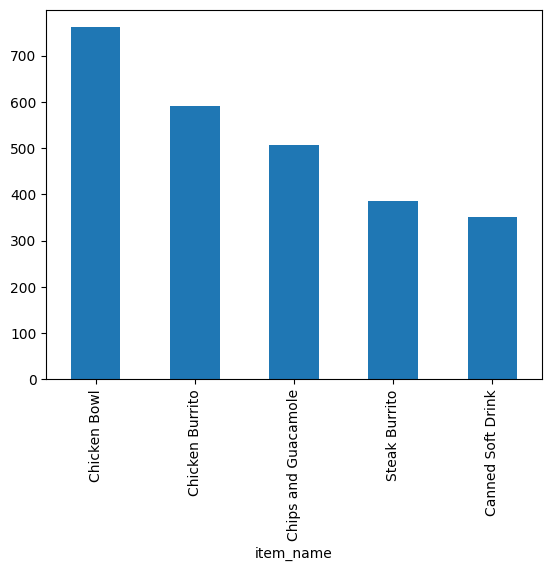

In [27]:
top5_items.plot.bar()

In [29]:
top10_items = chipotle_data.groupby('item_name')['quantity'].sum().nlargest(10)
top10_items


item_name
Chicken Bowl                    761
Chicken Burrito                 591
Chips and Guacamole             506
Steak Burrito                   386
Canned Soft Drink               351
Chips                           230
Steak Bowl                      221
Bottled Water                   211
Chips and Fresh Tomato Salsa    130
Canned Soda                     126
Name: quantity, dtype: int64

<Axes: ylabel='quantity'>

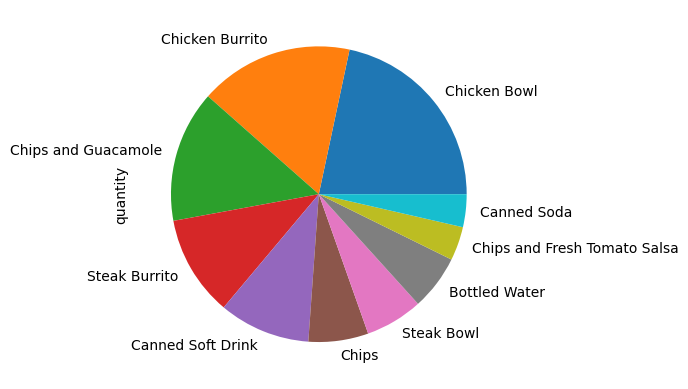

In [32]:
top10_items.plot.pie()

In [49]:
chipotle_data.groupby('item_name')['item_price'].sum().nlargest(10)

item_name
Chicken Bowl           7342.73
Chicken Burrito        5575.82
Steak Burrito          3851.43
Steak Bowl             2260.19
Chips and Guacamole    2201.04
Chicken Salad Bowl     1228.75
Chicken Soft Tacos     1108.09
Veggie Burrito          934.77
Barbacoa Burrito        894.75
Veggie Bowl             867.99
Name: item_price, dtype: float64

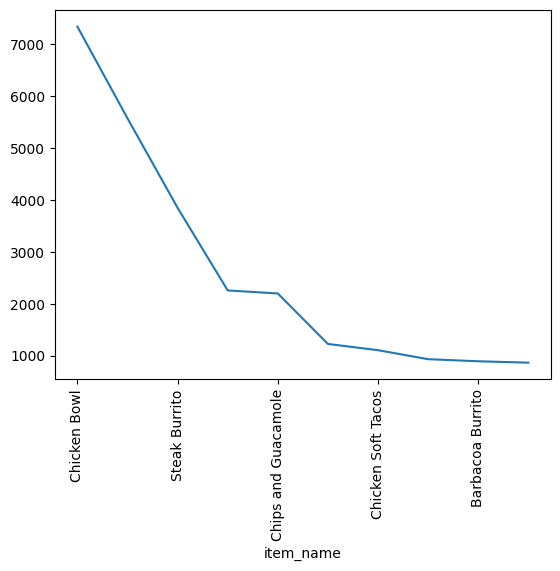

In [63]:
chipotle_data.groupby('item_name')['item_price'].sum().nlargest(10).plot.line()
plt.xticks(rotation='vertical')
plt.show()

In [37]:
chipotle_data['item_name'].plot(kind='pie', labels=chipotle_data['item_price'])

TypeError: '<' not supported between instances of 'str' and 'int'